<a href="https://colab.research.google.com/github/wozzin/AI_deeplearning/blob/main/Relu_DNN_tf_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#이진분류 신경망 numpy_make 진행
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


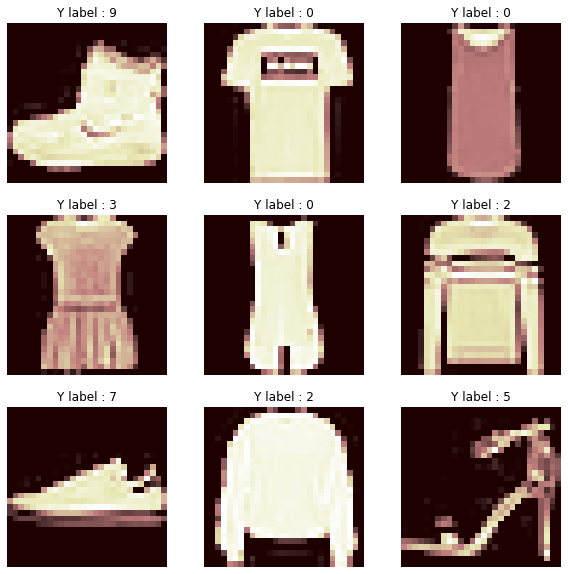

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.title('Y label : {}'.format(train_Y[i]))
    plt.axis('off')
    plt.imshow(train_X[i], cmap = 'pink')

plt.show()

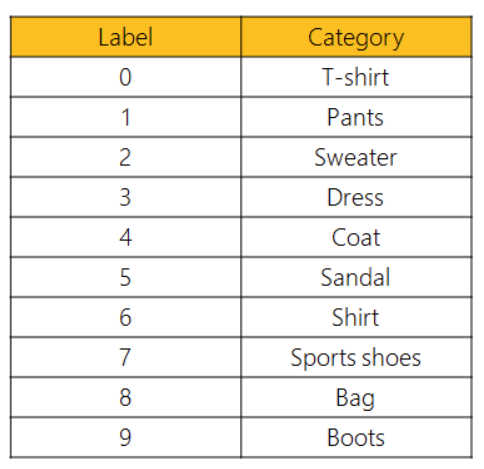

In [ ]:
#데이터 구성 2차원 확인
print("train_X[0].shape : ", train_X[0].shape)
print("train_X[0].ndim : ", train_X[0].ndim)

train_X[0].shape :  (28, 28)
train_X[0].ndim :  2


In [ ]:
#전체데이터를 미니배치로 구성했을때
#3차원데이터 확인
#현 데이터 흑백 // 컬러데이터라면 데이터값에 rgb값 추가 ==> 4차원 
print("train_X.shape : ", train_X.shape)
print("train_X.ndim : ", train_X.ndim)

train_X.shape :  (60000, 28, 28)
train_X.ndim :  3


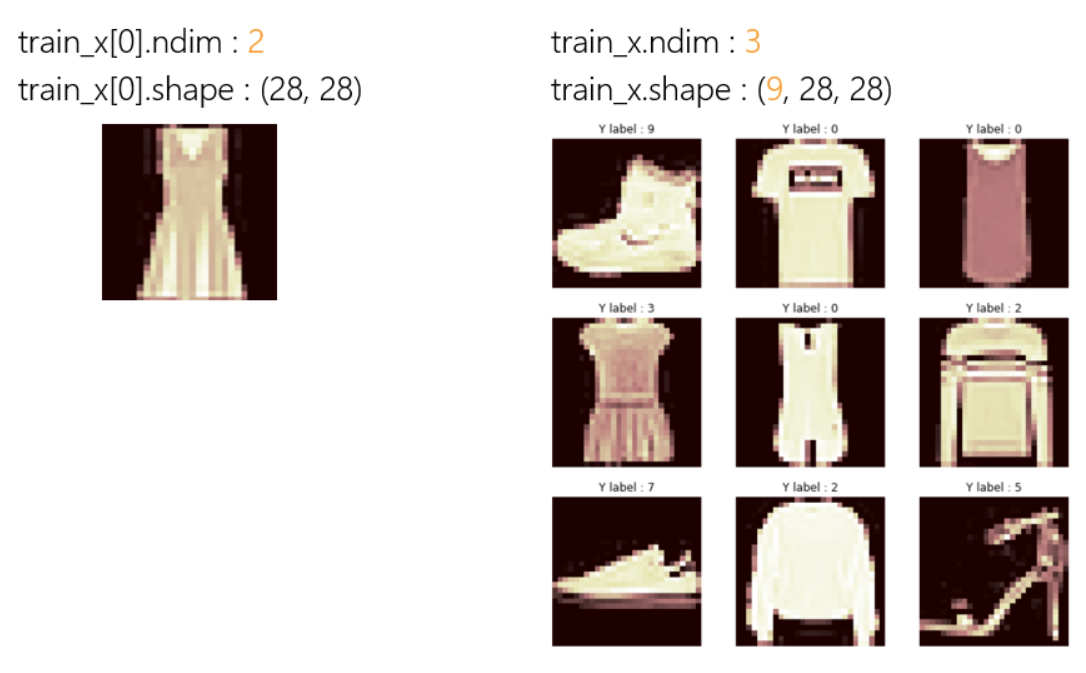

In [ ]:
print(np.min(train_X))
print(np.max(train_X))

0
255


In [ ]:
# 데이터 정규화 mean_max
train_X_norm = train_X / 255.0
print("np.min(train_X_norm) : ",np.min(train_X_norm))
print("np.max(train_X_norm) : ",np.max(train_X_norm))

test_X_norm = test_X / 255.0
print("np.min(test_X_norm) : ",np.min(test_X_norm))
print("np.max(test_X_norm) : ",np.max(test_X_norm))

np.min(train_X_norm) :  0.0
np.max(train_X_norm) :  1.0
np.min(test_X_norm) :  0.0
np.max(test_X_norm) :  1.0


In [ ]:
print(train_X_norm.shape)
print(train_Y.shape)

(60000, 28, 28)
(60000,)


In [ ]:
Fmnist_Relu_DNN = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
    ])

In [ ]:
Fmnist_Relu_DNN.compile(optimizer = tf.keras.optimizers.Adam(), 
                        loss = 'sparse_categorical_crossentropy',
                        metrics = ['accuracy'])
Fmnist_Relu_DNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = Fmnist_Relu_DNN.fit(train_X,train_Y,epochs = 500,validation_split = 0.25,
                              batch_size = 32,
                              callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 4s 3ms/step - loss: 1.8160 - accuracy: 0.7389 - val_loss: 0.5703 - val_accuracy: 0.8031
Epoch 2/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5453 - accuracy: 0.8130 - val_loss: 0.5095 - val_accuracy: 0.8178
Epoch 3/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4907 - accuracy: 0.8275 - val_loss: 0.5040 - val_accuracy: 0.8261
Epoch 4/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4628 - accuracy: 0.8361 - val_loss: 0.4690 - val_accuracy: 0.8328
Epoch 5/500
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4328 - accuracy: 0.8475 - val_loss: 0.5227 - val_accuracy: 0.8190
Epoch 6/500
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4164 - accuracy: 0.8520 - val_loss: 0.4461 - val_accuracy: 0.8467
Epoch 7/500
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4000 - accuracy: 0.8585 - val_loss: 0.4288 - val_ac

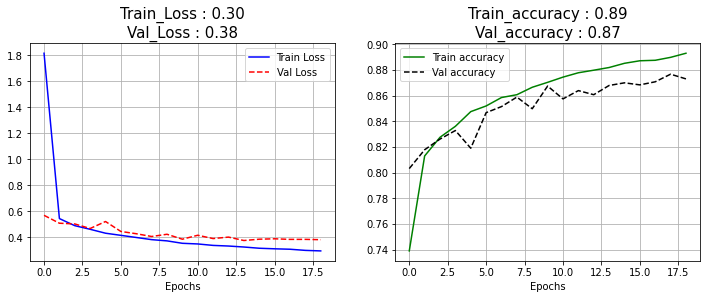

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy     = history.history['accuracy']

val_loss = history.history['val_loss']
loss     = history.history['loss']

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')

plt.xlabel('Epochs')
plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".format(loss[-1], val_loss[-1]),
          fontsize = 15)

plt.legend()
plt.grid()


plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'g-', label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'Val accuracy')

plt.xlabel('Epochs')
plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".format(accuracy[-1], val_accuracy[-1]),
          fontsize = 15)

plt.legend()
plt.grid()

plt.show()


In [14]:
pred_Y = Fmnist_Relu_DNN.predict(test_X[[15]])
print(pred_Y)


[[7.7845516e-06 9.9992287e-01 3.7226162e-09 6.4830354e-05 8.0000291e-09
  4.5715748e-07 2.7134345e-07 5.7900121e-07 3.0370786e-06 1.5553711e-08]]


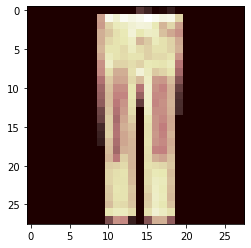

Probability Distribution 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] 

Pred_Y : 1, Test_Y : 1 → Correct True


In [15]:
pred_Y = np.round(pred_Y)
plt.imshow(test_X[15], cmap = 'pink')
plt.show()

pred_Y_argmax = np.argmax(pred_Y)
correct       = np.equal(pred_Y_argmax, test_Y[15])

print("Probability Distribution \n {} ".format(pred_Y))
print("\nPred_Y : {}, Test_Y : {} → Correct {}".format(pred_Y_argmax, test_Y[15], correct))

실습 코드 

[9 2 1 1 6 1 4 6 5 7]


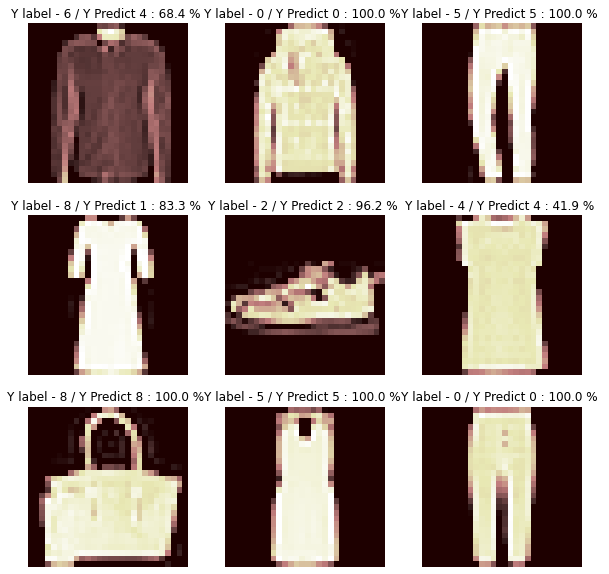

In [ ]:
pred_Y = Fmnist_Relu_DNN.predict(test_X)
pred_Y = np.round(pred_Y,3)

pred_Y_argmax = np.argmax(pred_Y,axis = 1)
print(pred_Y_argmax[:10])

plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    
    i = np.random.choice(range(0,10000))

    plt.title('Y label - {} / Y Predict {} : {} % '.format(test_Y[i], pred_Y_argmax[i], np.round(np.max(pred_Y[:][i]) * 100,3) ))
    plt.axis('off')
    plt.imshow(train_X[i],cmap='pink')

plt.show()